In [1]:
## Importing library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Context

Suatu perusahaan yang bergerak di bidang aplikasi taxi online ingin mengetahui bagaimana karakteristik dari penumpang yang telah menggunakan jasa mereka, sehingga nantinya perusahaan dapat meneruapkan promo yang sesuai dan tepat sasaran kepada pelanggan mereka. Maka dari itu, dibutuhkan suatu proses yang melibatkan data-driven agar bisa mendapatkan hasil yang sesuai dengan kondisi yang terjadi. 

Dari permasalahan di atas maka saya akan melakukan suatu pemodelan machine learning dengan unsupervised learning untuk dapat melihat pola-pola tersembunyi yang terdapat di dalam data sehingga nantinya dapat dikelompokkan (clustering) menjadi beberapa kelompok/grup yang memiliki sifat/karakteristik yang sama.

In [2]:
# Read the dataset
df = pd.read_csv("ONLINETAXI_TRANSACTION.csv")
df.head()

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2,7.22,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,132,28
1,1,1,7.50,1,N,1,25.0,0.5,0.5,4.00,0.00,0.3,30.30,230,33
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224948 entries, 0 to 224947
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   VENDOR               224948 non-null  int64  
 1   passenger_count      224948 non-null  int64  
 2   trip_distance        224948 non-null  float64
 3   rate_code            224948 non-null  int64  
 4   store_and_fwd_flag   224948 non-null  object 
 5   payment_type         224948 non-null  int64  
 6   fare_amount          224948 non-null  float64
 7   extra                224948 non-null  float64
 8   mta_tax              224948 non-null  float64
 9   tip_amount           224948 non-null  float64
 10  tolls_amount         224948 non-null  float64
 11  imp_surcharge        224948 non-null  float64
 12  total_amount         224948 non-null  float64
 13  pickup_location_id   224948 non-null  int64  
 14  dropoff_location_id  224948 non-null  int64  
dtypes: float64(8), in

## Tentang Dataset
### Dataset terdiri dari 224948 baris data dan 15 kolom. Masing - masing kolom berisikan informasi sebagai berikut:

- VENDOR : Kode vendor yang menyediakan catatan perjalanan.
- passenger_count : Jumlah penumpang di dalam kendaraan.
- trip_distance : Jarak perjalanan yang dicatat oleh argometer.
- rate_code : Kode tarif akhir yang berlaku di akhir perjalanan.
        1= Tarif standar
        2= JFK
        3= Newark
        4= Nassau atau Westchester
        5= Tarif yang dinegosiasikan
        6= Perjalanan kelompok
- store_and_fwd_flag : Karena data penyimpanan tidak terhubung ke server secara langsung, maka terdapat catatan kendaraan yang disimpan melalui memori yang dipicu dengan menurunkan bendera pada alat rekam yang berada dalam kendaraan. 
        Y= Perjalanan yang disimpan dan diteruskan ke server.
        N= Bukan perjalanan yang disimpan dan diteruskan ke server.
- payment_type : Kode numerik yang menandakan jenis pembayaran untuk perjalanan tersebut.
        1= Kartu kredit
        2= Uang Tunai
        3= Tanpa biaya
        4= Perselisihan
        5= Tidak diketahui
        6= Perjalanan batal
- fare_amount : Tarif gabungan antara waktu dan jarak yang dihitung oleh argometer.
- extra : Biaya tambahan dan lain-lain.
- mta_tax : Metropolitan Transportation Authority. Pajak yang dikenakan ketika perjalanan ke wilayah tertentu.
- tip_amount : Jumlah Tip yang diberikan oleh penumpang. (Tidak termasuk tip dengan uang cash)
- tolls_amount : Total biaya tol yang dibayarkan selama perjalanan.
- imp_surcharge : Biaya tambahan untuk peningkatan fasilitas.
- total_amount : Jumlah total biaya yang harus dibayarkan oleh penumpang. Tidak termasuk tip dengan uang tunai.
- pickup_location_id : Kode Zona lokasi ketika argometer dinyalakan.
- dropoff_location_id : Kode Zona lokasi ketika argometer dimatikan.

In [4]:
# General data info
listItem = []
for col in df.columns :
    listItem.append([col,
                     df[col].dtype,
                     len(df),
                     df[col].isna().sum(),
                     round((df[col].isna().sum()/len(df[col])) * 100,2),
                     df[col].nunique(), 
                     df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 
                               'Data Type', 
                               'Data Count', 
                               'Missing Value', 
                               'Missing Value Percentage', 
                               'Number of Unique', 
                               'Unique'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique
0,VENDOR,int64,224948,0,0.0,3,"[2, 1, 4]"
1,passenger_count,int64,224948,0,0.0,9,"[2, 1, 5, 6, 4, 3, 0, 9, 7]"
2,trip_distance,float64,224948,0,0.0,2533,"[7.22, 7.5, 9.74, 10.92, 10.5, 9.65, 6.47, 8.4..."
3,rate_code,int64,224948,0,0.0,7,"[1, 5, 3, 4, 6, 2, 99]"
4,store_and_fwd_flag,object,224948,0,0.0,2,"[N, Y]"
5,payment_type,int64,224948,0,0.0,4,"[1, 3, 2, 4]"
6,fare_amount,float64,224948,0,0.0,511,"[22.5, 25.0, 34.0, 31.5, 32.5, 29.5, 21.5, 25...."
7,extra,float64,224948,0,0.0,11,"[0.5, 0.0, 1.0, -0.5, -1.0, 81.92, -4.5, 0.8, ..."
8,mta_tax,float64,224948,0,0.0,5,"[0.5, 0.0, -0.5, 2.38, 3.0]"
9,tip_amount,float64,224948,0,0.0,1449,"[4.76, 4.0, 6.16, 7.71, 5.07, 7.31, 4.56, 8.1,..."


In [5]:
# Check Duplicate

df[df.duplicated()]

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
2335,2,1,2.5,1,N,1,26.0,0.0,0.5,5.36,0.00,0.3,32.16,170,211
2926,1,1,12.0,1,N,1,35.5,0.0,0.5,8.40,5.76,0.3,50.46,138,234
3448,1,1,6.0,1,N,1,24.5,0.0,0.5,5.05,0.00,0.3,30.35,90,166
4998,1,1,0.2,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,170,170
5909,1,1,10.4,1,N,1,30.0,0.5,0.5,6.25,0.00,0.3,37.55,138,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223180,1,1,0.8,1,N,1,5.0,0.5,0.5,1.25,0.00,0.3,7.55,48,50
223183,1,1,0.5,1,N,1,5.0,0.5,0.5,1.25,0.00,0.3,7.55,114,79
223189,1,1,0.7,1,N,1,5.0,0.5,0.5,1.25,0.00,0.3,7.55,162,170
223191,1,1,1.0,1,N,1,5.0,0.5,0.5,1.25,0.00,0.3,7.55,264,264


Terdapat sebanyak 3424 data yang merupakan data duplikat yang selanjutnya akan dihapus

In [6]:
# Removing duplicate data
df.drop_duplicates(inplace = True)

In [7]:
df.describe()

,VENDOR,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000,221524.000000
mean,1.597466,1.602743,2.967630,1.048040,1.310161,14.680003,0.333986,0.497106,1.895944,0.353460,0.299543,18.063664,162.579143,160.569983
std,0.516843,1.249637,3.804603,0.599618,0.480802,741.629958,0.494746,0.042476,2.581827,1.530069,0.015909,741.861596,66.439342,70.512386
min,1.000000,0.000000,0.000000,1.000000,1.000000,-146.000000,-4.500000,-0.500000,-5.000000,-5.760000,-0.300000,-146.800000,1.000000,1.000000
25%,1.000000,1.000000,0.990000,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,114.000000,107.000000
50%,2.000000,1.000000,1.630000,1.000000,1.000000,9.500000,0.000000,0.500000,1.450000,0.000000,0.300000,11.800000,162.000000,162.000000
75%,2.000000,2.000000,3.080000,1.000000,2.000000,14.500000,0.500000,0.500000,2.460000,0.000000,0.300000,17.800000,233.000000,233.000000
max,4.000000,9.000000,204.810000,99.000000,4.000000,349026.720000,81.920000,3.000000,120.000000,42.280000,1.000000,349116.780000,265.000000,265.000000


### Dari Informasi di atas, kita dapat menyimpulkan:

- Tidak terdapat Missing value pada Dataset.
- Pada fitur `rate_code` terdapat value dengan nilai `99`, yang merupakan nilai yang berbeda dari kode yang seharusnya dicantumkan pada kolom, sehingga data tersebut harus dihapus.
- Terdapat fitur yang merupakan kategorikal data pada dataset yaitu `store_and_fwd_flag`, sehingga nanti diperlukan encoding sebelum dilakukan pemodelan.
- Terdapat value 0 pada kolom `passenger_count`, yang menyatakan bahwa tidak ada penumpang namun terdapat catatan perjalanan, sehingga data tersebut perlu dihapus.
- Terdapat nilai 0 pada `trip_distance`, yang berarti tidak dilakukannya perjalanan atau argometer tidak berfungsi dengan baik. Data tersebut juga perlu dihapus.
- Terdapat nilai negative pada biaya-biaya yang harus dibayarkan oleh pelanggan (`fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `imp_surcharge`, `total_amount`), sehingga data tersebut perlu untuk dihapus.

Selanjutnya akan dilakukan cleaning data berupa penghapusan data yang memang tidak sesuai dengan nilai yang seharusnya.

In [8]:
# Removing data
df = df[df['rate_code'] != 99] ## Data rate_code bernilai 99
df = df[df['passenger_count'] != 0] ## Data passenger_count yang berjumlah 0 penumpang
df = df[df['trip_distance'] != 0] ## Data trip_distance yang berjarak 0
df = df[df['fare_amount'] >= 0] ## Data fare_amount yang bernilai negatif
df = df[df['extra'] >= 0] ## Data extra yang bernilai negatif
df = df[df['mta_tax'] >= 0] ## Data mta_tax yang bernilai negatif
df = df[df['tip_amount'] >= 0] ## Data tip_amount yang bernilai negatif
df = df[df['tolls_amount'] >= 0] ## Data tolls_amount yang bernilai negatif
df = df[df['imp_surcharge'] >= 0] ## Data imp_surcharge yang bernilai negatif
df = df[df['total_amount'] >= 0] ## Data total_amount yang bernilai negatif
print(f"Jumlah baris data setelah dihapus adalah {len(df)}")

Jumlah baris data setelah dihapus adalah 218038


In [9]:
df.describe()

,VENDOR,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000,218038.000000
mean,1.603230,1.618525,2.989978,1.037172,1.306084,13.046370,0.334348,0.498319,1.889295,0.352906,0.299974,16.424784,162.471826,160.451852
std,0.515761,1.246969,3.812991,0.263595,0.474749,11.341633,0.460346,0.028942,2.517021,1.528931,0.002800,14.049295,66.346048,70.442038
min,1.000000,1.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.760000,114.000000,107.000000
50%,2.000000,1.000000,1.650000,1.000000,1.000000,9.500000,0.000000,0.500000,1.450000,0.000000,0.300000,11.800000,162.000000,162.000000
75%,2.000000,2.000000,3.100000,1.000000,2.000000,14.500000,0.500000,0.500000,2.460000,0.000000,0.300000,17.800000,233.000000,233.000000
max,4.000000,9.000000,204.810000,6.000000,4.000000,1020.500000,4.500000,0.500000,120.000000,42.280000,0.300000,1034.800000,265.000000,265.000000


Dengan melihat sekilas bahwa beberapa fitur memiliki nilai max yang sangat tinggi, yang memungkinkan terdapatnya outlier. Selanjutnya akan dilakukan pengecekan outliers dengan menggunakan kode di bawah ini.

In [10]:
## Data Outliers
# trip_distance Outlier Check With Function

Q1_amount = df['trip_distance'].describe()['25%']
Q3_amount = df['trip_distance'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['trip_distance'] < Q1_amount - (1.5 * iqr)) | (df['trip_distance']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['trip_distance'] > Q1_amount - (1.5 * iqr)) & (df['trip_distance']< Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2,7.22,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,132,28
1,1,1,7.50,1,N,1,25.0,0.5,0.5,4.00,0.00,0.3,30.30,230,33
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224763,1,1,6.50,1,N,1,19.0,0.5,0.5,2.00,0.00,0.3,22.30,138,28
224769,4,1,6.28,1,N,1,19.0,0.0,0.5,2.00,0.00,0.3,21.80,13,162
224813,1,2,6.40,1,N,1,19.0,1.0,0.5,2.00,0.00,0.3,22.80,140,87
224838,2,3,6.38,1,N,1,19.0,0.5,0.5,1.00,0.00,0.3,21.30,148,74


In [11]:
## Data Outliers
# total_amount Outlier Check With Function

Q1_amount = df['total_amount'].describe()['25%']
Q3_amount = df['total_amount'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['total_amount'] < Q1_amount - (1.5 * iqr)) | (df['total_amount']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['total_amount'] > Q1_amount - (1.5 * iqr)) & (df['total_amount']< Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165
5,2,5,9.65,1,N,1,29.5,0.5,0.5,7.31,5.76,0.3,43.87,138,68
7,1,1,8.40,1,N,1,25.5,0.5,0.5,8.10,5.76,0.3,40.66,138,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213528,2,1,0.57,1,N,1,5.0,0.0,0.5,61.00,0.00,0.3,66.80,186,48
223343,1,2,5.60,1,N,1,19.0,0.5,0.5,6.50,5.76,0.3,32.56,114,195
223351,2,1,4.26,1,N,1,19.0,1.0,0.5,15.00,0.00,0.3,35.80,234,217
223839,1,1,6.10,1,N,1,19.0,0.0,0.5,6.35,5.76,0.3,31.91,138,168


Terdapat beberapa data outliers pada fitur `trip_distance` dan `total_amount` pada dataset, data outliers ini akan dibiarkan terlebih dahulu untuk diproses lebih

Selanjutnya, mari kita lihat korelasi di antara fitur-fiturnya. (Tidak termasuk data atribut kategorik)

<AxesSubplot:>

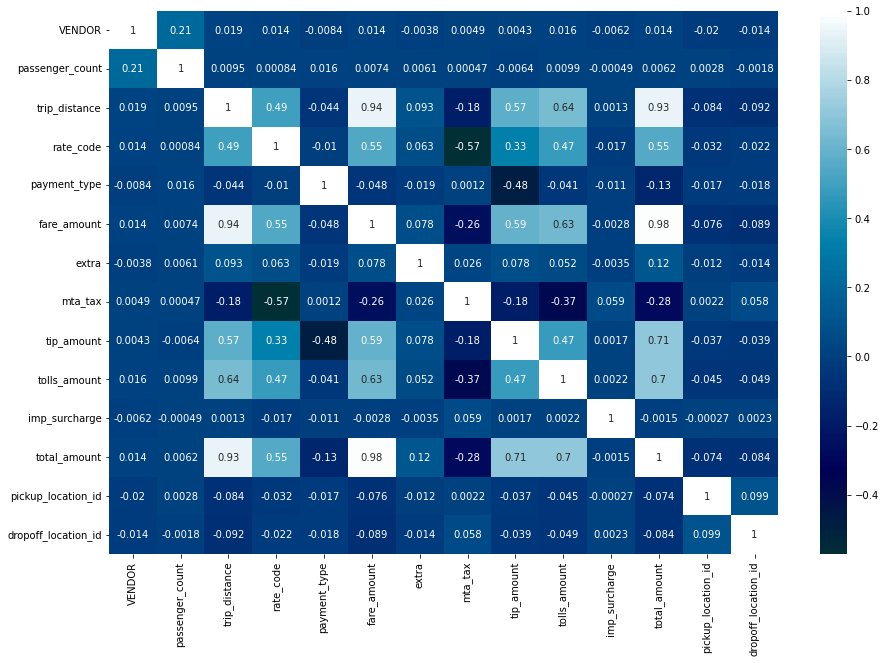

In [12]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,10))  
sns.heatmap(corrmat,annot=True, cmap='ocean', center=0)

Data yang tersedia kini sudah cukup bersih, selanjutnya akan dilanjutkan ke tahap preprocessing data.

## Preprocessing Data

Pada bagian ini, saya akan melakukan preprocessing data untuk melakukan pemodelan clustering.

Langkah-langkah berikut diterapkan untuk praproses data:

- Encoding fitur kategorikal
- Scaling fitur menggunakan standardscaler, karena mayoritas data merupakan data numerik yang memiliki skala yang berbeda-beda.
- Membuat dataframe baru hasil dari reduksi dimensi/fitur yang digunakan untuk axis/label pada visualisasi clustering.

In [13]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N' : 0, 'Y' : 1}) ## Label Encoding => Untuk mengubah Text menjadi angka 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218038 entries, 0 to 224947
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   VENDOR               218038 non-null  int64  
 1   passenger_count      218038 non-null  int64  
 2   trip_distance        218038 non-null  float64
 3   rate_code            218038 non-null  int64  
 4   store_and_fwd_flag   218038 non-null  int64  
 5   payment_type         218038 non-null  int64  
 6   fare_amount          218038 non-null  float64
 7   extra                218038 non-null  float64
 8   mta_tax              218038 non-null  float64
 9   tip_amount           218038 non-null  float64
 10  tolls_amount         218038 non-null  float64
 11  imp_surcharge        218038 non-null  float64
 12  total_amount         218038 non-null  float64
 13  pickup_location_id   218038 non-null  int64  
 14  dropoff_location_id  218038 non-null  int64  
dtypes: float64(8), in

Semua fitur sekarang bertipe numerikal

In [15]:
# Creating a copy of data
ds = df.copy()
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [16]:
scaled_ds.head() ## Dataframe yang akan digunakan untuk pemodelan

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,0.769292,0.305922,1.109374,-0.141021,-0.065626,-0.644731,0.833535,0.359843,0.058079,1.140519,-0.230819,0.009335,0.863762,-0.459287,-1.880300
1,-1.169593,-0.496024,1.182807,-0.141021,-0.065626,-0.644731,1.053963,0.359843,0.058079,0.838574,-0.230819,0.009335,0.987612,1.017820,-1.809319
2,0.769292,-0.496024,1.770274,-0.141021,-0.065626,-0.644731,1.847501,0.359843,0.058079,1.696734,3.536526,0.009335,2.191945,-0.368852,1.257038
3,0.769292,2.711762,2.079743,-0.141021,-0.065626,-0.644731,1.627074,0.359843,0.058079,2.312542,3.536526,0.009335,2.124326,-0.368852,0.007782
4,-1.169593,-0.496024,1.969593,-0.141021,-0.065626,-0.644731,1.715245,0.359843,0.058079,1.263681,-0.230819,0.009335,1.597608,-0.218127,0.064566


Dalam kasus data catatan perjalanan taxi online ini, terdapat banyak faktor yang mempengaruhi antar satu sama lain yang dapat dilihat juga melalui nilai korelasi antar variabelnya, maka dari itu untuk meminimalisir penggunaan fitur dalam penentuan clustering nantinya sehingga dapat diinterpretasikan melalui visualisasi clustering saya akan melakukan reduksi menggunakan Principal Component Analysis.

**Principal Component Analysis** (PCA) adalah teknik untuk mengurangi dimensi kumpulan suatu dataframe, meningkatkan interpretasi tetapi pada saat yang sama meminimalisir informasi yang hilang.

Langkah-langkah pada proses ini:

- Pengurangan dimensi/fitur dengan PCA
- Plotting Dataframe yang telah fiturnya telah direduksi

Pengurangan dimensi dengan PCA

Untuk kasus ini, saya akan mereduksi dimensi dari 15 komponen menjadi 2 komponen.

In [17]:
# only keep two components
pca = PCA(n_components = 2)
pca.fit(scaled_ds)

# transform the data
X_pca = pca.transform(scaled_ds)

# New PCA Dataframe
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,218038.0,-5.868174e-15,2.115006,-2.176443,-1.013986,-0.622138,0.045777,101.251646
col2,218038.0,2.549875e-16,1.151860,-20.777055,-0.649508,-0.385626,1.081119,23.851593


In [18]:
print("Original shape: {}".format(str(scaled_ds.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (218038, 15)
Reduced shape: (218038, 2)


Text(0, 0.5, 'Second Component')

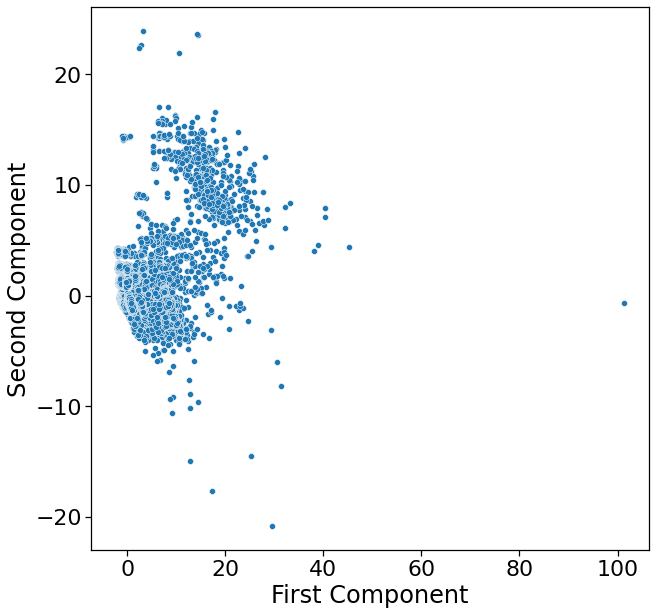

In [19]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    X_pca[:,0],
    X_pca[:,1],
    )

plt.xlabel('First Component')
plt.ylabel('Second Component')

## Clustering

Sekarang saya telah mengurangi atribut menjadi dua dimensi, selanjutnya saya akan melakukan clustering dengan menggunakan KMeans clustering. Dalam metode k-means kita memerlukan konsep jarak untuk mengetahui seberapa dekat suatu data poin dengan data poin lainnya. Salah satu konsep jarak yang dapat kita gunakan adalah jarak euclidean. Jarak euclidean pada dasarnya digunakan untuk mengukur jarak ketika fitur yang digunakan adalah fitur numerik

Langkah-langkah yang akan dikerjakan dalam proses ini:

- Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
- Clustering menggunakan K-Means Clustering
- Memeriksa cluster yang terbentuk melalui scatter plot

In [20]:
score = []

for i in range(2, 11): ## Jumlah cluster yang ingin digunakan
    model = KMeans(n_clusters = i, random_state = 42)
    model.fit_predict(X_pca)
    score.append(model.inertia_)

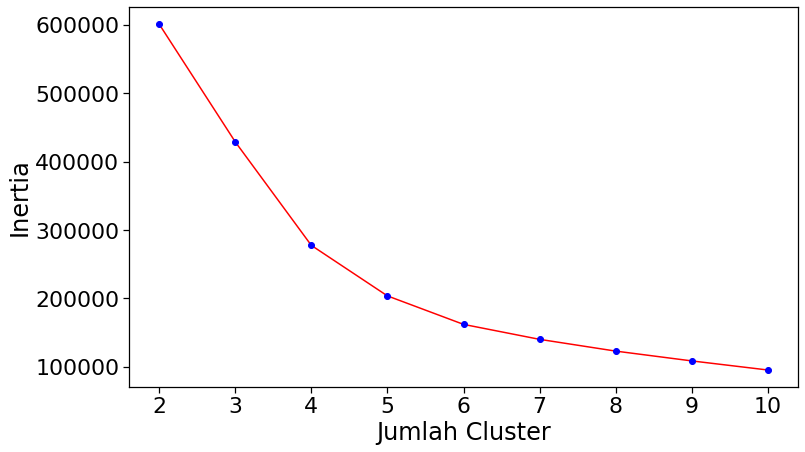

In [21]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(2, 11), score, 'r-')
plt.plot(np.arange(2, 11), score, 'bo')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

Dari grafik teknik Elbow di atas dapat dilihat jumlah cluster optimal yaitu berjumlah 5 cluster, dikarenakan tidak terjadi lagi penurunan yang signifikan setelahnya.

Selanjutnya, kita akan memasang Model Agglomerative Clustering untuk mendapatkan cluster akhir.

In [22]:
# #Initiating the Agglomerative Clustering model 
# AC = AgglomerativeClustering(n_clusters=5)

# # fit model and predict clusters
# clusters = AC.fit_predict(X_pca)
# PCA_ds["Clusters"] = clusters

# #Adding the Clusters feature to the orignal dataframe.
# # df["Clusters"]= clusters

In [23]:
# Initiating the K-Means Clustering model
model_KM = KMeans(n_clusters= 5, random_state = 42)

# fit model and predict clusters
model_KM.fit_predict(X_pca) 
cluster = model_KM.fit_predict(X_pca)

# Adding the segment feature to the original dataframe
df['segment'] = cluster

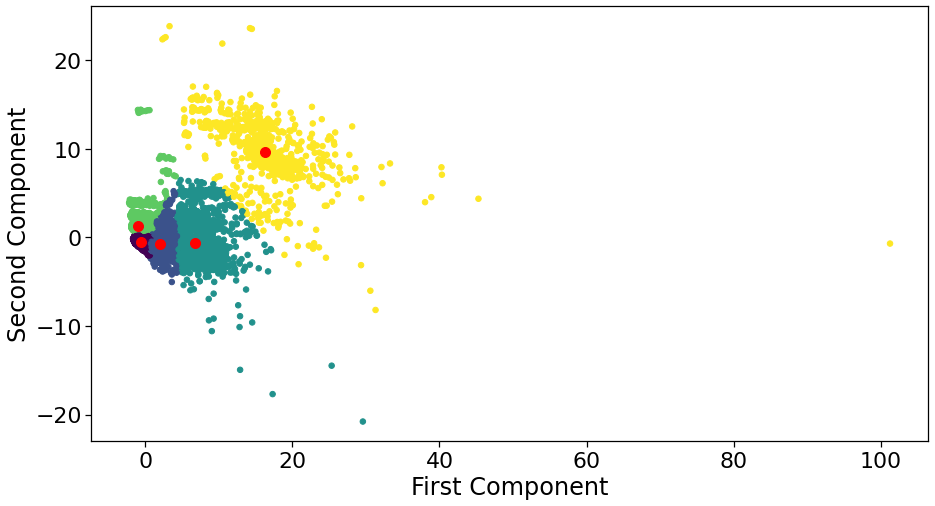

In [24]:
# Assign the centroid of the cluster
centroid = model_KM.cluster_centers_

# Plotting the cluster 
plt.figure(figsize = (15, 8))
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = cluster, s = 30)
plt.scatter(x = centroid[:, 0], y = centroid[:, 1], c='r', s = 100)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()

## Evaluating Models

Karena proyek ini merupakan kasus unsupervised learning, kita tidak memiliki label yang menjadi penanda untuk mengevaluasi model yang telah dibuat. Tujuan dari proses clustering ini adalah untuk mempelajari pola-pola dalam cluster untuk menentukan sifat/karakteristik dari pola cluster yang telah dihasilkan.

Untuk itu, kita akan melihat data berdasarkan cluster melalui eksplorasi analisis data dan penarikan kesimpulan.

Pertama, mari kita lihat distribusi data dari hasil clustering pada feature `segment`.

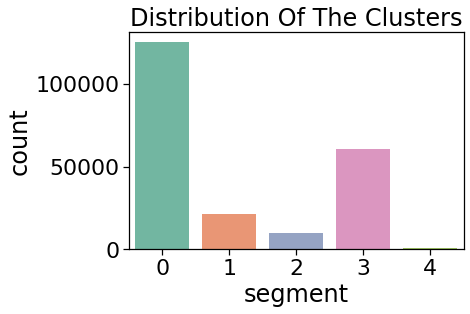

In [25]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["segment"], palette= 'Set2')
pl.set_title("Distribution Of The Clusters")
plt.show()

Dapat dilihat bahwa cluster tidak terdistribusi secara merata.

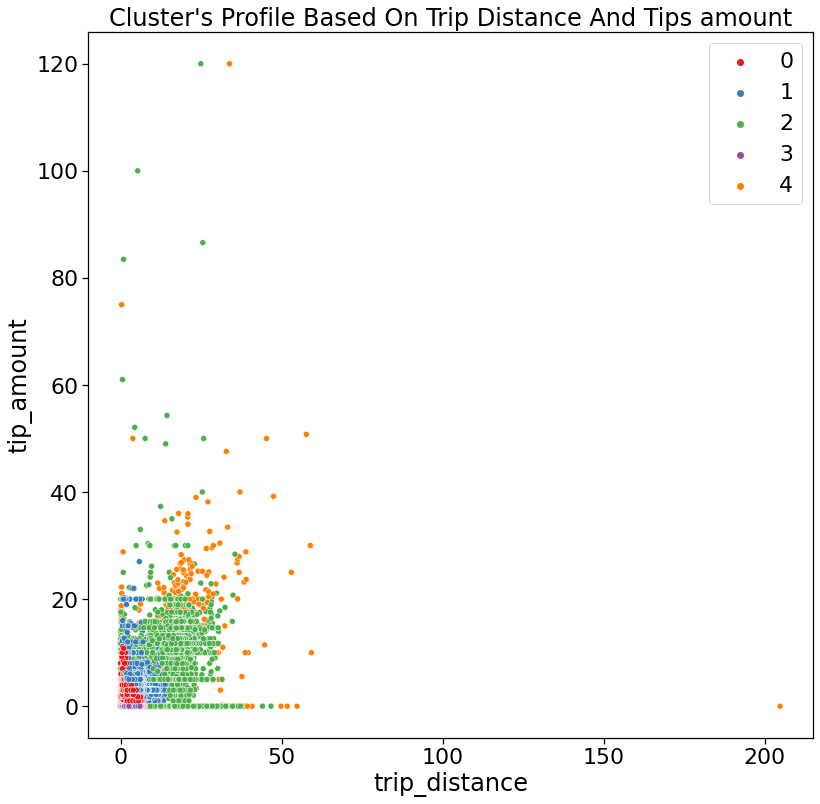

In [26]:
plt.figure(figsize = (13,13))
pl = sns.scatterplot(data = df,x=df["trip_distance"], y=df["tip_amount"],hue=df["segment"], palette= 'Set1')
pl.set_title("Cluster's Profile Based On Trip Distance And Tips amount")
plt.legend()
plt.show()

Terdapat satu data point yang anomali dengan nilai yang sangat tinggi, saya akan menghapus data tersebut untuk mendapatkan hasil yang lebih mudah diinterpretasi.

In [27]:
df = df[df['trip_distance'] != df['trip_distance'].max()]

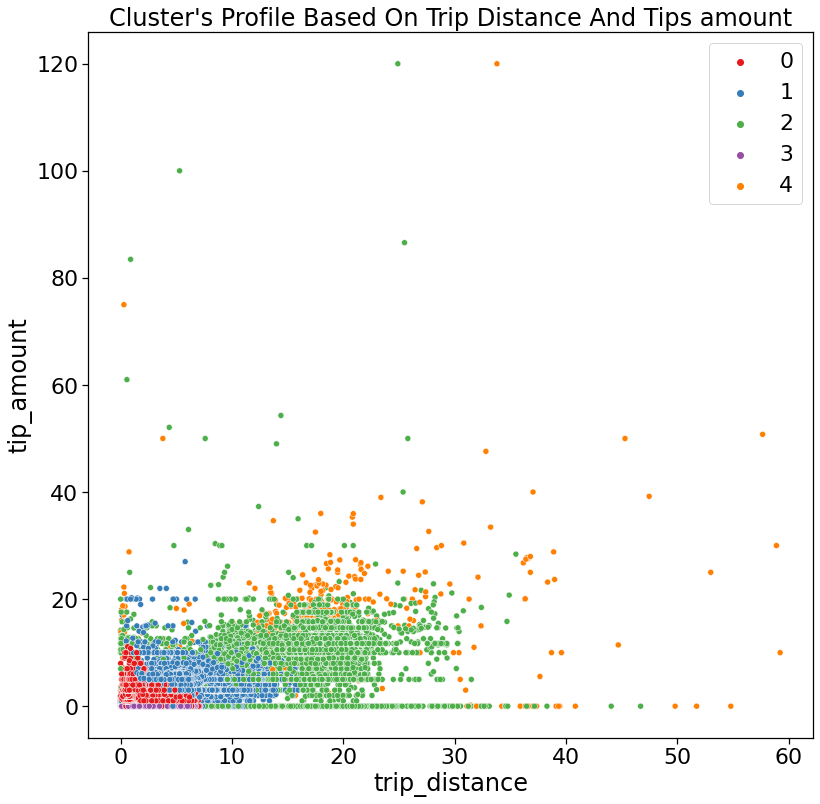

In [28]:
plt.figure(figsize = (13,13))
pl = sns.scatterplot(data = df,x=df["trip_distance"], y=df["tip_amount"],hue=df["segment"], palette= 'Set1')
pl.set_title("Cluster's Profile Based On Trip Distance And Tips amount")
plt.legend()
plt.show()

Jarak Perjalanan (trip_distance) vs Jumlah tips (tip_amount) menunjukkan pola pada cluster:

- group 0: low trip distance & low tips
- group 1: high trip distance & average tips
- group 2: low trip distance & very low tips
- group 3: average trip distance & average tips
- group 4: high tip distance - high tips atau high trip distance - low tips atau low trip distance - high tips 

Selanjutnya kita akan mencari tahu bagaimana pola cluster terhadap jumlah pelanggan yang dibawa dalam suatu perjalanan.

<Figure size 720x720 with 0 Axes>

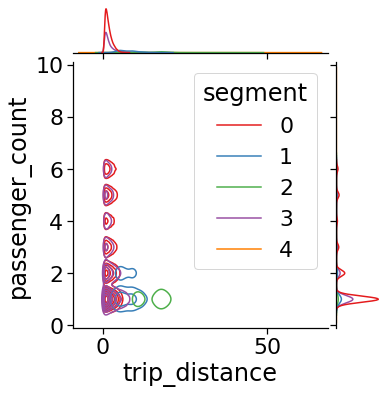

In [31]:
plt.figure(figsize = (10,10))
sns.jointplot(x=df['trip_distance'], y=df["passenger_count"], hue =df["segment"], kind="kde", palette='Set1')
plt.show()

In [ ]:
- group 0: melakukan perjalanan yang dekat, baik untuk perseorangan hingga perjalanan kelompok
- group 1: didominasi untuk penumpang yang realtif sedikit (hingga 2 orang), dan melakukan perjalanan yang lebih jauh dari group 0
- group 2: Penumpang perseorangan dan dominan melakukan perjalanan yang jauh daripada semua grup
- group 3: memiliki kemiripan dengan grup 0 akan tetapi selalu melakukan perjalanan lebih rendah dari perjalanan terjauh group 0
- group 4: merupakan group yang tersebar/noise sehingga pasti selalu ada dalam kondisi apa pun.